In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [2]:
df=pd.read_csv('clusteringDB.csv')
df.head()
df.dropna(axis=0,how='any',subset=['lat','long'],inplace=True)

In [3]:
X=df.loc[:,['disease','lat','long']]
X

,disease,lat,long
0,Blackleg,12.34567,98.76543
1,Blackleg,12.34765,93.76543
2,Enterotoxaemia (pulpy kidney),14.34567,98.86543
3,Classical swine fever,12.34444,98.01010
4,Azurskey's,10.34567,100.76543
5,Blackleg,21.34567,80.76543
6,Azurskey's,18.34507,90.70543
7,Classical swine fever,12.00000,98.42424
8,Enterotoxaemia (pulpy kidney),25.87875,92.79543
9,Blackleg,17.34567,91.76543


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
dfle = X
dfle.disease = le.fit_transform(dfle.disease)
dfle

,disease,lat,long
0,1,12.34567,98.76543
1,1,12.34765,93.76543
2,3,14.34567,98.86543
3,2,12.34444,98.01010
4,0,10.34567,100.76543
5,1,21.34567,80.76543
6,0,18.34507,90.70543
7,2,12.00000,98.42424
8,3,25.87875,92.79543
9,1,17.34567,91.76543


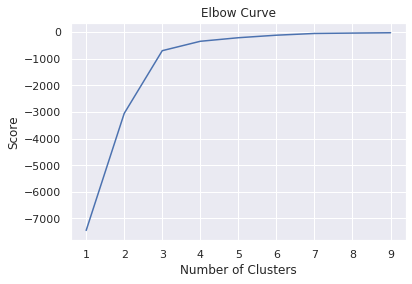

In [6]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dfle[['lat']]
X_axis = dfle[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [7]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(dfle[dfle.columns[0:3]])
dfle['cluster_label'] = kmeans.fit_predict(dfle[dfle.columns[0:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(dfle[dfle.columns[0:3]])

In [11]:
dfle.head(31)

,disease,lat,long,cluster_label
0,1,12.34567,98.76543,3
1,1,12.34765,93.76543,3
2,3,14.34567,98.86543,3
3,2,12.34444,98.01010,3
4,0,10.34567,100.76543,3
5,1,21.34567,80.76543,0
6,0,18.34507,90.70543,3
7,2,12.00000,98.42424,3
8,3,25.87875,92.79543,1
9,1,17.34567,91.76543,3
